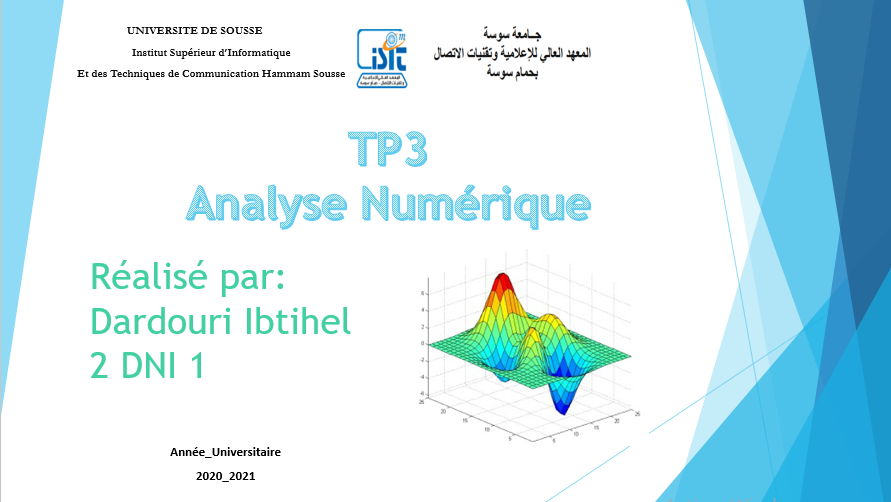

# <font color='red'>Implémentation du code</font>

In [181]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from numpy import *


## <font color='green'>Méthode des Rectangle Gauche</font>

In [182]:
class RectangleG (object) :
    def __init__ (self , a , b ,n ,f) :
        self.a = a 
        self.b = b
        self.x = np.linspace(a,b,n+1)
        self.f = f
        self.n = n
       
    def integrate (self ,f) :
        x = self.x
        y = f(x)
        h = float(x[1] - x[0])
        s = sum(y[ 0 : -1])
        return h*s
    def graphe (self , f , resolution =1001) :
        xl = self.x
        yl = f(xl)
        xlist_fine = np.linspace(self.a , self.b , resolution)
        for i in range (self.n) :
            x_rect = [xl[i] , xl[i] , xl[i+1] , xl[i+1] , xl[i] ]
            y_rect = [0 , yl[i] , yl[i] , 0 , 0 ]
            plt.plot(x_rect , y_rect ,'r')
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine,yflist_fine)
        plt.plot(xl , yl , "bo")
        plt.xlabel ('x')
        plt.ylabel ('f(x)')
        plt.title('méthode de rectangle gauche')
        
            

## <font color='green'>Méthode des Trapéze</font>

In [183]:
class trapeze(object) :
    def __init__ (self , a , b ,n ,f) :
        self.a = a 
        self.b = b
        self.x = np.linspace(a,b,n+1)
        self.f = f
        self.n = n
    def integrate (self ,f) :
        x = self.x
        y = f(x)
        h = float(x[1] - x[0])
        s = y[0] + y[-1] + 2.0*sum(y[1:-1])
        return h*s/2.0
    def graphe (self , f , resolution =1001) :
        xl = self.x
        yl = f(xl)
        xlist_fine = np.linspace(self.a , self.b , resolution)
        for i in range (self.n) :
            x_rect = [xl[i] , xl[i] , xl[i+1] , xl[i+1] , xl[i] ]
            y_rect = [0 , yl[i] , yl[i] , 0 , 0 ]
            plt.plot(x_rect , y_rect ,"m")
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine,yflist_fine)
        plt.plot(xl , yl , "cs")
        plt.ylabel ('f(x)')
        plt.title('méthode des trapéze')


        

## <font color='green'>Méthode Simpson</font>

In [184]:
class Simpson(object) :
    def __init__ (self , a , b ,n ,f) :
        self.a = a 
        self.b = b
        self.x = np.linspace(a,b,n+1)
        self.f = f
        self.n = n
        
    def integrate (self ,f) :
        x = self.x
        y = f(x)
        h = float(x[2] - x[1])
        n = len(x) -1
        if n % 2 == 1 :
            s = y[0] + y[n] + 4.0 * sum(y[1:-1:2]) + 2.0 * sum(y[2:-2:2])
        return h * s / 3.0
    def graphe (self , f , resolution =1001) :
        xl = self.x
        yl = f(xl)
        xlist_fine = np.linspace(self.a , self.b , resolution)
        for i in range (self.n) :
            xx = np.linspace(xl[ i ],xl[i + 1],resolution)
            m = (xl[i]+ xl[i + 1])/ 2
            a = xl[i]
            b = xl[i +1]
            l0  =(xx-m)/(a-m)*(xx-b)/(a-b)
            l1 =(xx-a)/(m-a)*(xx-b)/(m-b)
            l2 =(xx-a)/(b-a)*(xx-m)/(b-m)
            P = f(a)*l0 + f(m)*l1 + f(b)*l2
            plt.plot(xx , P ,'r')
            plt.plot(m , f(m) ,'g*')
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine,yflist_fine , 'y')
        plt.plot(xl , yl , "bo")
        plt.xlabel ('x')
        plt.ylabel ('f(x)')
        plt.title('méthode de Simpson')

## <font color='green'>Méthode des Points Milieu</font>

In [185]:
class Milieu(object) :
    def __init__ (self , a , b ,n ,f) :
        self.a = a 
        self.b = b
        self.x = np.linspace(a,b,n+1)
        self.f = f
        self.n = n   
       
    def integrate (self ,f) :
        x = self.x
        y = f(x)
        h = float(x[1] - x[0])
        s = 0
        for i in range (self.n) :
            s = s+f((x[i]+x[i+1])*0.5) 
        return h*s
    def graphe (self , f , resolution =1001) :
        xl = self.x
        yl = f(xl)
        xlist_fine = np.linspace(self.a , self.b , resolution)
        for i in range (self.n) :
            m = (xl[i] + xl[i+1])/2
            x_rect = [xl[i] , xl[i] , xl[i+1] , xl[i+1] , xl[i] ]
            y_rect = [0 , f(m) , f(m) , 0 , 0 ]
            plt.plot(x_rect , y_rect ,'g')
            plt.plot(m , f(m) ,'r*')
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine,yflist_fine , 'b')
        plt.xlabel ('x')
        plt.ylabel ('f(x)')
        plt.title('méthode de Milieu')

In [186]:
Sel = widgets.Dropdown(
      options=[('méthode de rectangle gauche',1) , ('méthode des trapéze',2) , ('méthode de Simpson',3) , ('méthode de Milieu',4)] ,
      value=2 ,
      description='Choix de Méthode:',
)

text_func = widgets.Text(value='sin(x)' , description='Fonction' , continious_update=False)
text_xlabel = widgets.Text(value='' , description='abscisse' , continious_update=False)
text_ylabel = widgets.Text(value='' , description='ordonnée' , continious_update=False)
text_a = widgets.Text(value='-1' , description='a' , continious_update=False)
text_b = widgets.Text(value='1' , description='b' , continious_update=False)
text_n = widgets.Text(value='3' , description='N' , continious_update=False)
text_int = widgets.Text(value='' , description='I_N' , continious_update=True)
button = widgets.Button(description="Calculer")


def sim(b):
    dic={1:RectangleG,2:trapeze,3:Simpson,4:Milieu}
    s=Sel.value
    plt.cla()
    func=lambda x:eval(text_func.value) 
    R=dic[s](float(text_a.value), float(text_b.value),int(text_n.value),func)
    R.graphe(func)
    text_int.value=str(R.integrate(func))
    text_int.description='I_'+text_n.value
    
    
def update_a(change) :
    change.new
def update_b(change) :
    change.new
def update_n(change) :
    change.new
def update_f(change) :
    change.new

button.on_click(sim)

text_func.observe(update_f , 'value')
text_a.observe(update_a , 'value')
text_b.observe(update_b , 'value')


In [187]:
output = widgets.Output()
with output:
    fig, ax = plt.subplots(constrained_layout=True , figsize=(6,4))
fig.canvas.toolbar_position='bottom'

In [188]:
def make_boxes() :
    vbox1 = widgets.VBox([Sel,text_func,text_a,text_b,text_n,button,text_int])
    vbox2 = widgets.VBox([output])
    return vbox1,vbox2
box_layout = widgets.Layout(
        border='solid 2px orange',
        margin='0px 10px 10px 0px',
        padding='5px 5px 5px 5px')
vbox1,vbox2 = make_boxes()
vbox1.layout = box_layout
vbox2.layout = box_layout
widgets.HBox([vbox1,vbox2])